In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

<h2> The objective of this code is make a classification using neural networks, useful to find hidden patterns in data. <h2/>

In [39]:
# Generate dispersed points for two concentric circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=42, factor=0.5)

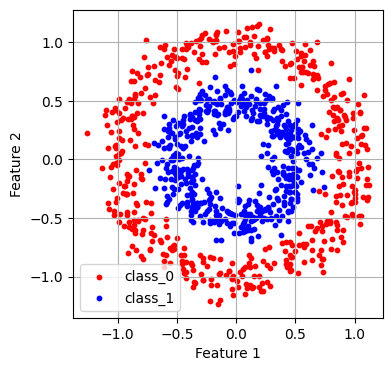

In [40]:
# Plot the generated data
plt.figure(figsize=(4, 4))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], s=10, color='red',  label='class_0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], s=10, color='blue', label='class_1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Define the TensorFlow model
model = Sequential()

optimizer = Adam(learning_rate=0.001,)

model.add(Dense(64, input_shape=(2,), activation='relu'))  # Input layer with 2 features and a hidden layer with 64 units and ReLU activation
model.add(Dense(32, activation='relu'))                    # Hidden layer with 32 units and ReLU activation
model.add(Dense(1,  activation='sigmoid'))                 # Output layer with 1 unit and Sigmoid activation (binary classification)

# Compile the model
model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])

2024-02-08 09:19:36.939321: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-08 09:19:36.979732: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 1s 10ms/step - loss: 0.6830 - accuracy: 0.5156 - val_loss: 0.6711 - val_accuracy: 0.4688
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.5078 - val_loss: 0.6520 - val_accuracy: 0.4688
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6286 - accuracy: 0.5109 - val_loss: 0.6276 - val_accuracy: 0.4938
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5986 - accuracy: 0.5437 - val_loss: 0.5918 - val_accuracy: 0.5688
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.6766 - val_loss: 0.5396 - val_accuracy: 0.8000
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5002 - accuracy: 0.8750 - val_loss: 0.4777 - val_accuracy: 0.9062
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4342 - accuracy: 0.9516 - val_loss: 0.4042 - val_accuracy: 0.9688
Epoch 8/10
20/20 [=

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

7/7 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.9700
Test Loss: 0.23860779404640198, Test Accuracy: 0.9700000286102295


In [37]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

df = pd.DataFrame()
df['X1_test'] = X_test[:,0]
df['x2_test'] = X_test[:,1]
df['y_pred_prob'] = predictions
df['y_pred'] = predicted_classes
df['y'] = y_test
df

7/7 [==============================] - 0s 1ms/step


,X1_test,x2_test,y_pred_prob,y_pred,y
0,-0.183067,0.390134,0.878987,1,1
1,0.168505,0.869701,0.197252,0,0
2,-0.370716,-0.151243,0.865017,1,1
3,-0.174255,1.020947,0.075895,0,0
4,0.180431,-0.649801,0.553765,1,1
...,...,...,...,...,...
195,0.682261,0.593896,0.204100,0,0
196,-0.445419,0.094120,0.848158,1,1
197,0.862200,-0.094400,0.202141,0,0
198,-0.321888,0.404748,0.817721,1,1


In [9]:
def boundary_plot(X_, y_, model, nature:str='test'):

    """
    :param X_: X_train or X_test
    :param y_: y_train or y_test
    :param model: constructed neural network
    :param nature: 'test' or 'train'
    :return: None
    """

    # Generate a grid of points covering the feature space
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Make predictions on the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    Z = model.predict(grid_points)
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(6.5, 6))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.3)

    # Plot the training data points
    plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')
    plt.title(f'Decision Boundary Plot for the {nature} sample')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

313/313 [==============================] - 0s 1ms/step


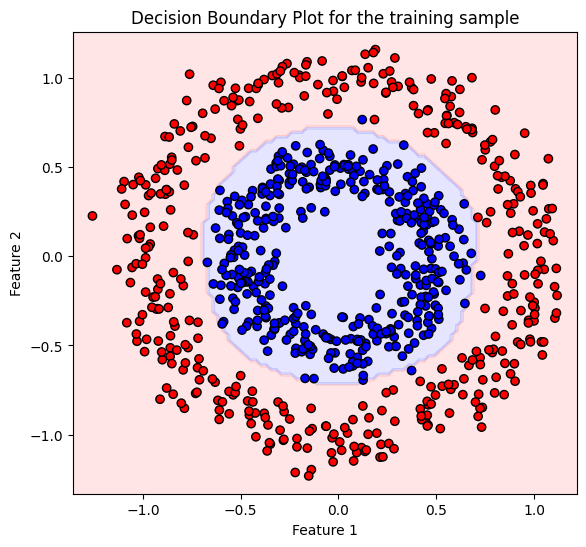

In [10]:
# plot for the training sample
boundary_plot(X_train, y_train, model, nature='training')

313/313 [==============================] - 0s 980us/step


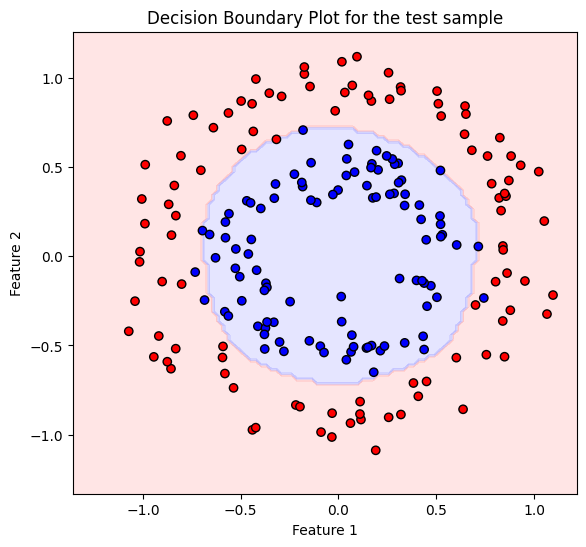

In [11]:
# plot for the test sample
boundary_plot(X_test, y_test, model, nature='test')